<a href="https://colab.research.google.com/github/GabeMaldonado/UoL_Study_Materials/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeseries
## Instructions:
* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the Essential readings or the documentation link provided, or go to the Topic 8 discussion forum. 
* Save your notebooks when you are done.

This notebook introduces you to the Pandas library, which is useful for when dealing with timeseries in python. For further details on Pandas, have a read through the Getting Started guide: https://pandas.pydata.org/pandas-docs/stable/. The '10 minutes to Pandas' guide provides a good introduction to the library: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html


**Task 1:**

Load in some time series data (you can use the artificial 'sit_stand_walk.csv' and plot it alongside it's ground truth


In [2]:
# You just need to run this cell

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sit_stand_walk.csv')
data.head()


,time,acc_y,ground
0,0.0,0.036661,-
1,0.1,0.088725,-
2,0.2,0.048065,-
3,0.3,-0.013483,-
4,0.4,0.081697,-


class map: {'-': 0, 'W': 1, '^': 2}


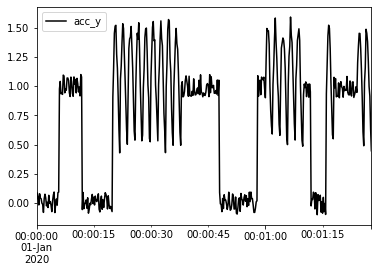

In [3]:

# The original data is sampled at 5Hz (period of 200ms). Let's say it starts on 1-1-2020 at 10am
data.index = pd.bdate_range(start='01-01-2020 10:00:00', periods=len(data), freq='200L')

series = data['acc_y']
ground = data['ground']
classes = { c:i for i,c in enumerate(np.unique(ground))} 
print('class map: %s' % classes)
# replace character ground truth labels with integers
ground.replace(classes, inplace=True)

series.plot(linestyle='-', color='k')
plt.legend()
plt.show()

**Task 2:**
Create a sliding (rolling) window over the data to extract features like mean and standard deviation. Use the pandas function, ```rolling``` and experiment with different window lengths.


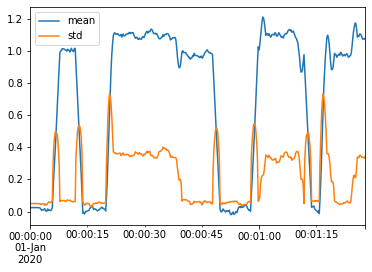

In [4]:
F = pd.DataFrame()
wnd_samples = 10 # samples
F['mean'] = series.rolling(window=wnd_samples).mean()
F['std'] = series.rolling(window=wnd_samples).std()

# We might need to fill in any NaN values left over from the rolling window (use .fillna(..))
F.fillna(method='backfill', inplace=True)

F.plot()
plt.show()

**Task 3:** 
Use these features to build a simple classifier (e.g. using ```sklearn```). Split the dataset in half to simulate separate training and test sets. But do not randomly mix the data, as the sequencing information is important.



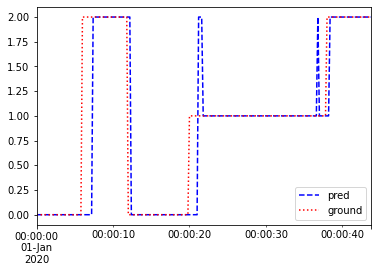

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        70
           1       0.98      0.89      0.93        90
           2       0.89      0.85      0.87        60

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.91      0.90      0.90       220



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# create indices for test data and train data -- cast these into timestamps
test_idx = F.index[np.arange(0,int(0.5*len(F)))]
train_idx = F.index[np.arange(int(0.5*len(F)), len(F))]

X_test  = F.loc[test_idx,:]
X_train = F.loc[train_idx,:]

y_test = ground[test_idx]
y_train = ground[train_idx]
# Create a simple decision tree, and fit the training data to it
dt = DecisionTreeClassifier(max_depth=2)

dt.fit(X_train, y_train)

# Generate predictions and plot them against the ground truth

y_pred = pd.DataFrame({'pred' : dt.predict(X_test)}, index = X_test.index)

y_pred.plot(color='b', linestyle='--', label='prediction')
y_test.plot(color='r', linestyle=":", label='ground')
plt.legend()
plt.show()
# Also generate precision and recall values

print(classification_report(y_test, y_pred))

**Task 4:** Now go back to the original data (without features extracted) and attempt to train a similar classifier directly on that data (rememeber to split the test and training sets). Plot the prediction output alongside the ground truth. And also run a precision-recall evaluation. 

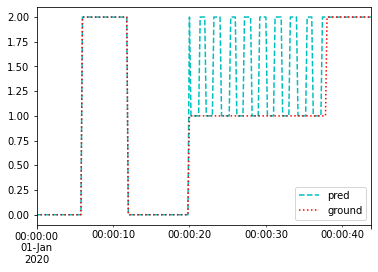

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      0.54      0.71        90
           2       0.59      1.00      0.75        60

    accuracy                           0.81       220
   macro avg       0.86      0.85      0.82       220
weighted avg       0.89      0.81      0.81       220



In [9]:
X_original_test = pd.DataFrame(series[test_idx])
X_original_train = pd.DataFrame(series[train_idx])

dt2 = DecisionTreeClassifier(max_depth=2)

dt2.fit(X_original_train, y_train)

# Generate predictions and plot them against the ground truth
y_original_pred = pd.DataFrame( {'pred': dt2.predict(X_original_test)}, index = X_test.index) 


y_original_pred.plot(color='c', linestyle='--', label= 'original prediction')
y_test.plot(color='r',linestyle=':',label='ground')
plt.legend()
plt.show()

# Also generate precision and recall values
print(classification_report(y_test,y_original_pred))

**Task 5:**
Compare the results from both of your classifiers -- the one using the original raw data, and the one using the sliding-window based features. What do you notice about the differences in precision-recall? And if you plot the outputs, what do you notice about the temporal distribution of the errors? Which method would seem more appropriate for a classifier that aims to robustly detect sitting, standing, and walking? 

Use the discussion forum for this topic discuss your answers to this. 